In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
%matplotlib inline

In [20]:
def Gaussian(data):
    mu, std = norm.fit(data)
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin,xmax, 100)
    p = norm.pdf(x, mu, std)
    return p

In [21]:
def Distr_D_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = (1/(3.2))*(x[i]**(-1+(1/2)))*((1-x[i])**(-1/2))
    
    return p

def Distr_DIII_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = (1/(2.1))*(x[i]**(-1+(2/2)))*((1-x[i])**(-1/2))
    
    return p

def Distr_C_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = 3*2*x[i]*(1-x[i]) 
    return p

def Distr_CI_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = (1.5)*np.sqrt(1-x[i])
    return p

In [22]:
df_Andreev_G_D = pd.read_csv(r'Channel/Andreev_G_D_Channel.txt', sep = '\t', header = None)
df_Andreev_P_D = pd.read_csv(r'Channel/Andreev_P_D_Channel.txt', sep = '\t', header = None)

df_Andreev_G_DIII = (1/2)*pd.read_csv(r'Channel/Andreev_G_DIII_Channel.txt', sep = '\t', header = None)
df_Andreev_P_DIII = (1/2)*pd.read_csv(r'Channel/Andreev_P_DIII_Channel.txt', sep = '\t', header = None)

df_Andreev_G_C = (1/2)*pd.read_csv(r'Channel/Andreev_G_C_Channel.txt', sep = '\t', header = None)
df_Andreev_P_C = (1/2)*pd.read_csv(r'Channel/Andreev_P_C_Channel.txt', sep = '\t', header = None)

df_Andreev_G_CI = (1/2)*pd.read_csv(r'Channel/Andreev_G_CI_Channel.txt', sep = '\t', header = None)
df_Andreev_P_CI = (1/2)*pd.read_csv(r'Channel/Andreev_P_CI_Channel.txt', sep = '\t', header = None)

In [23]:
df_Andreev_G_D.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.089432,0.532123,1.74324,2.35540,2.55199,3.23642,3.03478,3.94990,4.97729,4.63958
2,0.947344,1.389870,1.90507,2.07889,2.05920,3.46537,3.65619,3.88478,5.08332,5.08145
3,0.052257,0.975618,1.71085,2.19225,3.01550,2.97859,3.50679,3.67924,4.44247,4.53816
4,0.071887,0.996315,1.94644,2.25201,2.68574,2.68753,3.08923,4.22610,5.09814,4.88251
5,0.972974,0.622502,1.04188,2.34195,2.66961,3.47168,3.68055,3.80443,4.38387,5.17422
...,...,...,...,...,...,...,...,...,...,...
99996,0.343114,0.867562,1.72199,1.77473,2.02679,2.71062,3.69523,3.49786,4.37791,4.95561
99997,0.046526,1.135380,1.00498,2.26599,3.10370,2.88779,3.31506,4.18179,4.42406,4.90372
99998,0.556427,0.570188,1.39931,2.01801,2.26563,2.84628,3.54074,4.27500,4.62776,4.39938
99999,0.380052,1.164010,1.17997,1.63725,2.67276,2.93243,2.94413,4.41958,4.45793,4.48769


In [24]:
df_Andreev_G_DIII.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.078553,1.178015,1.222950,2.667925,3.187925,2.783045,3.934155,3.906960,4.591230,5.10630
2,0.757210,1.131615,1.864070,1.962655,2.385405,3.405475,3.430710,4.309230,4.439650,5.14360
3,0.290272,1.150770,1.518125,2.029100,2.626915,3.591105,3.771460,4.112460,5.132200,5.32260
4,0.189961,1.197225,1.798380,2.021735,3.038300,2.779250,3.669480,4.224050,4.280945,5.54190
5,0.957735,0.489462,1.615570,2.231690,2.603235,2.830335,3.651580,4.127415,4.996900,4.84634
...,...,...,...,...,...,...,...,...,...,...
99996,0.784460,1.013070,1.582950,1.776810,2.967230,2.444275,3.555675,4.093340,4.389765,5.34670
99997,0.997155,0.707435,1.939460,1.870440,3.037675,3.557720,3.758240,4.310425,4.575465,4.83046
99998,0.542120,1.038670,1.471730,2.070900,2.579860,3.497630,3.779205,4.311570,4.757020,4.94603
99999,0.880970,1.027150,1.638560,2.015880,3.248970,2.678265,3.528755,4.364680,5.312750,5.28130


In [25]:
df_Andreev_G_C.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.083688,0.810960,1.134570,2.276275,2.762940,2.972410,3.297125,4.199555,4.393695,4.836855
2,0.784625,0.936220,1.266405,1.961570,2.707070,3.159800,3.434490,3.995230,4.682055,4.926040
3,0.464994,0.945420,1.574320,2.128560,2.420570,2.989800,3.160570,3.967590,4.749120,5.232150
4,0.234328,0.833300,1.408270,2.033145,2.411330,3.048530,3.540050,3.746440,4.107465,4.679435
5,0.619815,1.024215,1.356075,2.124450,2.452040,2.956470,3.375430,4.198685,4.595270,4.800035
...,...,...,...,...,...,...,...,...,...,...
99996,0.278086,0.820965,1.385485,1.907650,2.482275,2.787440,3.413315,4.033045,4.303645,4.842380
99997,0.917665,1.137575,1.520490,1.883305,2.369400,2.930665,3.330315,4.051725,4.764320,5.251550
99998,0.723150,0.810855,1.098725,2.451955,2.489045,3.206445,3.247825,4.105860,4.434595,5.009350
99999,0.423744,1.137630,1.731960,1.796135,2.502230,2.989025,3.461830,3.862595,4.492245,5.052600


In [26]:
df_Andreev_G_CI.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.123468,0.637630,1.816865,1.473040,2.377595,3.294820,3.515855,3.729415,4.596575,4.926520
2,0.442800,0.381881,1.262930,1.795520,2.720770,2.664750,3.490910,3.764345,4.452480,5.071300
3,0.657530,0.837775,1.446880,2.277820,2.200530,2.787055,3.358550,3.836305,4.811775,5.011550
4,0.050460,0.521155,1.341425,2.260835,2.347870,2.703400,3.761360,3.766880,4.218285,5.047500
5,0.643735,0.788080,1.469900,1.859870,2.786200,3.091280,3.374355,3.759355,4.419045,4.709740
...,...,...,...,...,...,...,...,...,...,...
99996,0.459186,0.927895,1.236065,2.022820,2.292555,3.243445,4.187445,3.506315,4.103710,4.821595
99997,0.356648,1.166960,1.402595,1.872655,2.377725,2.745300,3.361010,3.852995,4.554235,4.451955
99998,0.592275,0.844525,1.377910,2.339465,2.956955,2.569725,3.655085,3.754805,4.556395,5.219550
99999,0.122081,1.109990,1.232530,2.066930,2.239725,3.074000,3.669780,3.918970,4.326205,4.610700


In [27]:
G_D = df_Andreev_G_D.values
P_D = df_Andreev_P_D.values

G_DIII = df_Andreev_G_DIII.values
P_DIII = df_Andreev_P_DIII.values

G_C = df_Andreev_G_C.values
P_C = df_Andreev_P_C.values

G_CI = df_Andreev_G_CI.values
P_CI = df_Andreev_P_CI.values

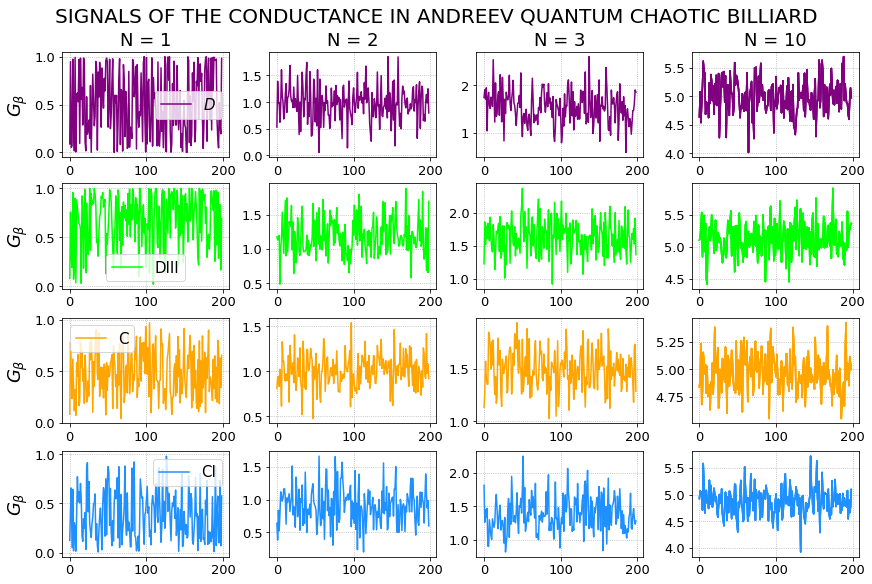

In [28]:
fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'SIGNALS OF THE CONDUCTANCE IN ANDREEV QUANTUM CHAOTIC BILLIARD', fontsize = 20)

for j in range(0,4):
    for i in range(0,4):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].plot(G_D[0:199,9], color='purple', label = r'D', alpha=1);
            axs[1,3].plot(G_DIII[0:199,9], color='lime', label = r'DIII', alpha=1);
            axs[2,3].plot(G_C[0:199,9], color='orange', label = r'C', alpha=1);
            axs[3,3].plot(G_CI[0:199,9], color='dodgerblue', label = r'CI', alpha=1);
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].plot(G_D[0:199,j], color='purple', label = r'$D$', alpha=1);
            else:
                if (i == 1):
                    axs[i,j].plot(G_DIII[0:199,j], color='lime', label = r'DIII', alpha=1);
                else:
                    if (i == 2):
                        axs[i,j].plot(G_C[0:199,j], color='orange', label = r'C', alpha=1);
                    else:
                        if (i == 3):
                            axs[i,j].plot(G_CI[0:199,j], color='dodgerblue', label = r'CI', alpha=1);
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$G_{\beta}$', fontsize = 18)
            axs[i,0].legend(fontsize = 15)
            
        axs[i,j].grid(linestyle=':')

/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


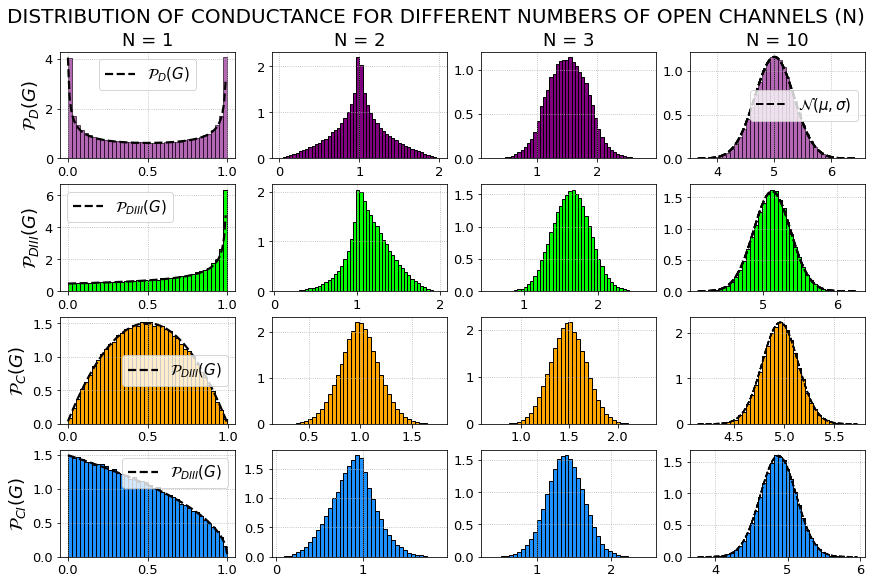

In [29]:
steps = 50

fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,4):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 0):
            
            axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(G)$', fontsize = 18)
            axs[1,0].set_ylabel(r'$\mathcal{P}_{DIII}(G)$', fontsize = 18)
            axs[2,0].set_ylabel(r'$\mathcal{P}_{C}(G)$', fontsize = 18)
            axs[3,0].set_ylabel(r'$\mathcal{P}_{CI}(G)$', fontsize = 18)
            
            axs[0,0].set_title('N = 1', fontsize = 18) 
            
            axs[0,0].hist(G_D[:,0], bins = 40, color='purple', alpha=0.2, density = True, histtype='bar', ec='black');
            axs[1,0].hist(G_DIII[:,0], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,0].hist(G_C[:,0], bins = 40, color='orange', alpha=1, density = True, histtype='bar', ec='black');
            axs[3,0].hist(G_CI[:,0], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');

            if (i == 0):
                x = np.linspace(np.min(G_D[:,0]), np.max(G_D[:,0]), 100)
                axs[0,0].plot(x, Distr_D_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[0,0].legend(fontsize = 15, loc = "best")
            
            elif (i == 1):
                x = np.linspace(np.min(G_DIII[:,0]), np.max(G_DIII[:,0]), 100)
                axs[1,0].plot(x, Distr_DIII_N1(G_DIII[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[1,0].legend(fontsize = 15, loc = "best")
                
            elif (i == 2):
                x = np.linspace(np.min(G_C[:,0]), np.max(G_C[:,0]), 100)
                axs[2,0].plot(x, Distr_C_N1(G_C[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[2,0].legend(fontsize = 15, loc = "best")
                
            elif (i == 3):
                x = np.linspace(np.min(G_CI[:,0]), np.max(G_CI[:,0]), 100)
                axs[3,0].plot(x, Distr_CI_N1(G_CI[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[3,0].legend(fontsize = 15, loc = "best")
            
        elif (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(G_D[:,9], bins = 40, color='purple', alpha=0.2, density = True, histtype='bar', ec='black');
            axs[1,3].hist(G_DIII[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(G_C[:,9], bins = 40, color='orange', alpha=1, density = True, histtype='bar', ec='black');
            axs[3,3].hist(G_CI[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');

            x = np.linspace(np.min(G_D[:,9]), np.max(G_D[:,9]), 100)
            axs[0,3].plot(x,Gaussian(G_D[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 2, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_DIII[:,9]), np.max(G_DIII[:,9]), 100)
            axs[1,3].plot(x,Gaussian(G_DIII[:,9]), color = 'black', alpha = 1, linewidth = 2, linestyle = 'dashed')

            x = np.linspace(np.min(G_C[:,9]), np.max(G_C[:,9]), 100)
            axs[2,3].plot(x,Gaussian(G_C[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_CI[:,9]), np.max(G_CI[:,9]), 100)
            axs[3,3].plot(x,Gaussian(G_CI[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(G_D[:,j], bins = 50, color='purple', label = r'D', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(G_DIII[:,j], bins = 50, color='lime', label = r'DIII', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(G_C[:,j], bins = 40, color='orange', label = r'C', alpha=1, density = True, histtype='bar', ec='black');
                    else:
                        if (i == 3):
                            axs[i,j].hist(G_CI[:,j], bins = 40, color='dodgerblue', label = r'CI', alpha=1, density = True, histtype='bar', ec='black');
            
        
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15, loc = 'best')
        
        axs[i,j].grid(linestyle=':')

/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


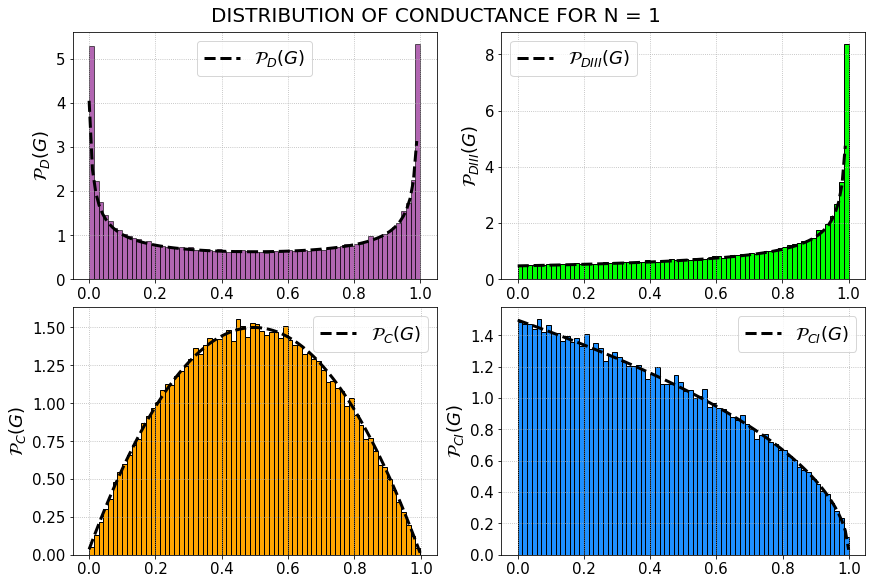

In [30]:
steps = 50

fig, axs = plt.subplots(2,2, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR N = 1', fontsize = 20)

         
axs[0,0].hist(G_D[:,0], bins = 70, color='purple', alpha=0.6, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_D[:,0]), np.max(G_D[:,0]), 100)
axs[0,0].plot(x, Distr_D_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(G)$', fontsize = 18)
axs[0,0].legend(fontsize = 18, loc = 'best')

axs[0,1].hist(G_DIII[:,0], bins = 70, color='lime', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_DIII[:,0]), np.max(G_DIII[:,0]), 100)
axs[0,1].plot(x, Distr_DIII_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[0,1].set_ylabel(r'$\mathcal{P}_{DIII}(G)$', fontsize = 18)
axs[0,1].legend(fontsize = 18, loc = 'best')

axs[1,0].hist(G_C[:,0], bins = 70, color='orange', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_C[:,0]), np.max(G_C[:,0]), 100)
axs[1,0].set_ylabel(r'$\mathcal{P}_{C}(G)$', fontsize = 18)
axs[1,0].plot(x, Distr_C_N1(G_C[:,0]), color = 'black', label = r'$\mathcal{P}_{C}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[1,0].legend(fontsize = 18, loc = 'best')

axs[1,1].hist(G_CI[:,0], bins = 70, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_CI[:,0]), np.max(G_CI[:,0]), 100)
axs[1,1].set_ylabel(r'$\mathcal{P}_{CI}(G)$', fontsize = 18)
axs[1,1].plot(x, Distr_CI_N1(G_CI[:,0]), color = 'black', label = r'$\mathcal{P}_{CI}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[1,1].legend(fontsize = 18, loc = 'best')

for i in range(2):
    for j in range(2):
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 15)
        axs[i,j].grid(linestyle=':')

In [31]:
meanG_D = np.mean(G_D, axis = 0)
meanG_DIII = np.mean(G_DIII, axis = 0)
meanG_C = np.mean(G_C, axis = 0)
meanG_CI = np.mean(G_CI, axis = 0)

varG_D = np.var(G_D, axis = 0)
varG_DIII = np.var(G_DIII, axis = 0)
varG_C = np.var(G_C, axis = 0)
varG_CI = np.var(G_CI, axis = 0)

meanP_D = np.mean(P_D, axis = 0)
meanP_DIII = np.mean(P_DIII, axis = 0)
meanP_C = np.mean(P_C, axis = 0)
meanP_CI = np.mean(P_CI, axis = 0)

varP_D = np.var(P_D, axis = 0)
varP_DIII = np.var(P_DIII, axis = 0)
varP_C = np.var(P_C, axis = 0)
varP_CI = np.var(P_CI, axis = 0)

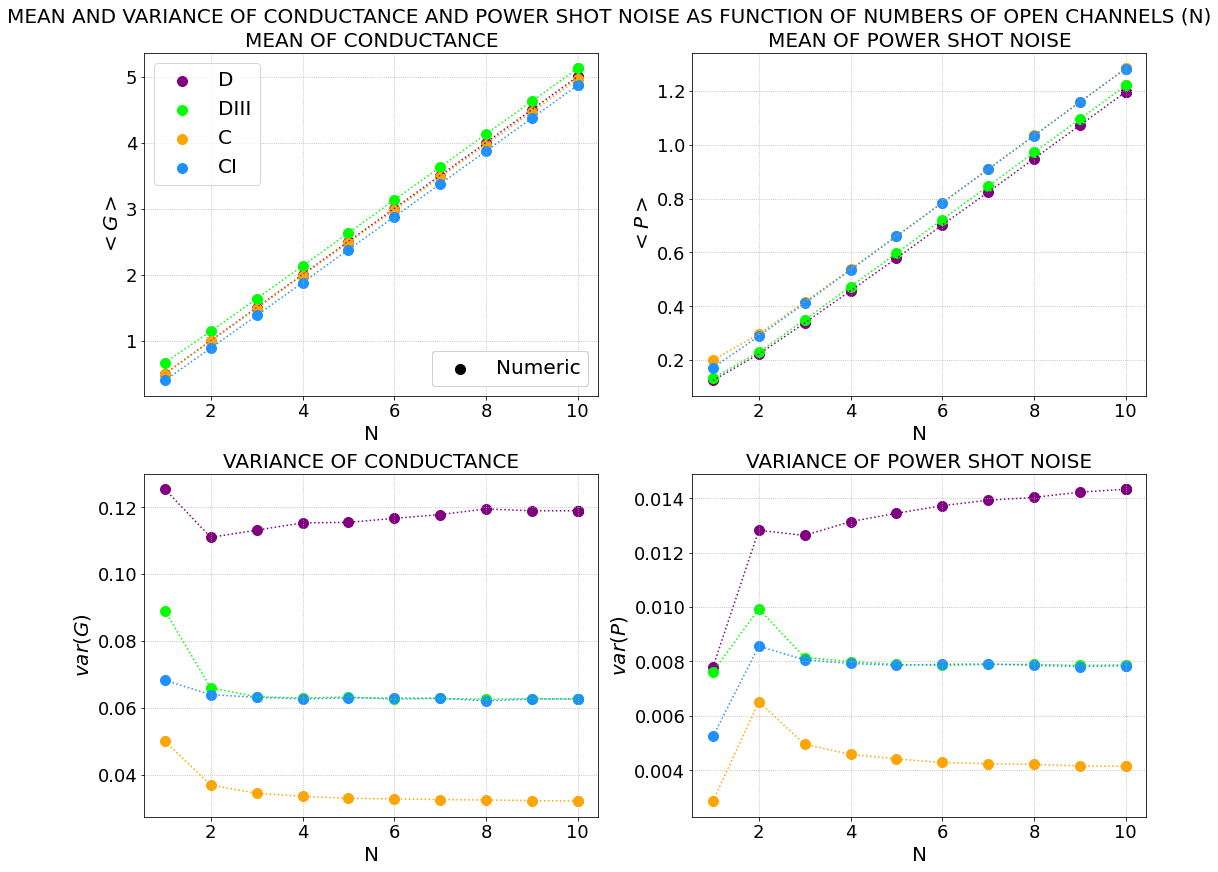

In [32]:
#meanG_O_aux = np.empty(10, dtype = float)
#meanG_U_aux = np.empty(10, dtype = float)
#meanG_S_aux = np.empty(10, dtype = float)

#varG_O_aux = np.empty(10, dtype = float)
#varG_U_aux = np.empty(10, dtype = float)
#varG_S_aux = np.empty(10, dtype = float)

#for N1 in range(1,11):
    
#    N2 = N1
#    NT = N1 + N2

#    meanG_O_aux[N1-1] = (1/2)*(4*1*(N1*N2*NT))/((1*NT+1)*(2*NT-1))
#    meanG_U_aux[N1-1] = (1/2)*(4*2*(N1*N2*NT))/((2*NT+1)*(2*NT-1))
#    meanG_S_aux[N1-1] = (1/2)*(4*4*(N1*N2*NT))/((4*NT+1)*(2*NT-1))
#    
#    varG_O_aux[N1-1] = (1/4)*(16*N1*N2*NT*(3+2*np.power(NT,3)+4*N1*N2*np.power(NT,2)-4*NT-4*N1*N2-5*np.power(N1,2)-5*np.power(N2,2)))/((2*NT-3)*((np.power((2*NT-1),2)))*(NT+3)*(np.power((NT+1),2))*(2*NT+1))
#    varG_U_aux[N1-1] = (1/4)*(8*N1*N2*(3+16*N1*N2*np.power(NT,2)-6*np.power(NT,2)-6*np.power(N1,2)-6*np.power(N2,2)))/((2*NT-3)*(2*NT+3)*(np.power((2*NT+1),2))*(np.power((2*NT-1),2)))
#    varG_S_aux[N1-1] = (1/4)*(32*N1*N2*NT*(3-16*N1*N2+8*NT-20*np.power(N1,2)-20*np.power(N2,2)-16*np.power(NT,3)+64*N1*N2*np.power(NT,2)))/((4*NT+3)*(np.power((4*NT+1),2))*(2*NT-3)*(np.power((2*NT-1),2))*(4*NT-1))

fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'MEAN AND VARIANCE OF CONDUCTANCE AND POWER SHOT NOISE AS FUNCTION OF NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('MEAN OF CONDUCTANCE', fontsize = 20)
            axs[0,0].set_ylabel(r'$<G>$', fontsize = 20)
            
            variable_D = meanG_D; variable_DIII = meanG_DIII; variable_C = meanG_C; variable_CI = meanG_CI
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('VARIANCE OF CONDUCTANCE', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(G)$', fontsize = 20)
            
                variable_D = varG_D; variable_DIII = varG_DIII; variable_C = varG_C; variable_CI = varG_CI
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('MEAN OF POWER SHOT NOISE', fontsize = 20)
                    axs[0,1].set_ylabel(r'$<P>$', fontsize = 20)
                    
                    variable_D = meanP_D; variable_DIII = meanP_DIII; variable_C = meanP_C; variable_CI = meanP_CI
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('VARIANCE OF POWER SHOT NOISE', fontsize = 20)
                        axs[1,1].set_ylabel(r'$var(P)$', fontsize = 20)
                        #axs[1,1].set_ylim([0,0.018])

                        variable_D = varP_D; variable_DIII = varP_DIII; variable_C = varP_C; variable_CI = varP_CI
        
        
        for k in range(0,len(meanG_D)):
            axs[i,j].scatter((k+1), variable_D[k], s = 100, color = 'purple', alpha = 1)
            axs[i,j].scatter((k+1), variable_DIII[k], s = 100, color = 'lime', alpha = 1)
            axs[i,j].scatter((k+1), variable_C[k], s = 100, color = 'orange', alpha = 1)
            axs[i,j].scatter((k+1), variable_CI[k], s = 100, color = 'dodgerblue', alpha = 1)
            
            if k == (len(meanG_D)-1):
                Numeric_scatter = axs[i,j].scatter((k+1), variable_D[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                Class_D = axs[i,j].scatter((k+1), variable_D[k], label = r'D', s = 100, color = 'purple', alpha = 1)
                Class_DIII = axs[i,j].scatter((k+1), variable_DIII[k], label = r'DIII', s = 100, color = 'lime', alpha = 1)
                Class_C = axs[i,j].scatter((k+1), variable_C[k], label = r'C', s = 100, color = 'orange', alpha = 1)
                Class_CI = axs[i,j].scatter((k+1), variable_CI[k], label = r'CI', s = 100, color = 'dodgerblue', alpha = 1)

        axs[i,j].plot([i for i in range(1,11)], variable_D, color = 'purple', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_DIII, color = 'lime', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_C, color = 'orange', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_CI, color = 'dodgerblue', linestyle = ':')
        
#        if (i == 0 and j == 0):
#            Exact_plot, = axs[0,0].plot([i for i in range(1,11)], meanG_O_aux, label = 'Exact', color = 'black', linestyle = '-')
#            axs[0,0].plot([i for i in range(1,11)], meanG_O_aux, color = 'dodgerblue', linestyle = '-')
#            axs[0,0].plot([i for i in range(1,11)], meanG_U_aux, color = 'red', linestyle = '-')
#            axs[0,0].plot([i for i in range(1,11)], meanG_S_aux, color = 'lime', linestyle = '-')
        
#        if (i == 1 and j == 0):
#            axs[1,0].plot([i for i in range(1,11)], varG_O_aux , color = 'dodgerblue', linestyle = '-')
#            axs[1,0].plot([i for i in range(1,11)], varG_U_aux, color = 'red', linestyle = '-')
#            axs[1,0].plot([i for i in range(1,11)], varG_S_aux, color = 'lime', linestyle = '-')

        axs[i,j].grid(linestyle=':')
        first_legend = axs[0,0].legend([Numeric_scatter], ["Numeric"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([Class_D, Class_DIII, Class_C, Class_CI], [r'D', r'DIII', r'C', r'CI'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel('N', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)

In [33]:
meanG_U = np.empty(10, dtype = float)

for i in range(10):
    N1 = i+1
    N2 = N1
    meanG_U[i] = N1*N2/(N1+N2)

[-0.00524767 -0.00730621 -0.01167061 -0.01225024 -0.01689629 -0.02068771
 -0.02343331 -0.02847194 -0.03280383 -0.0374254 ]


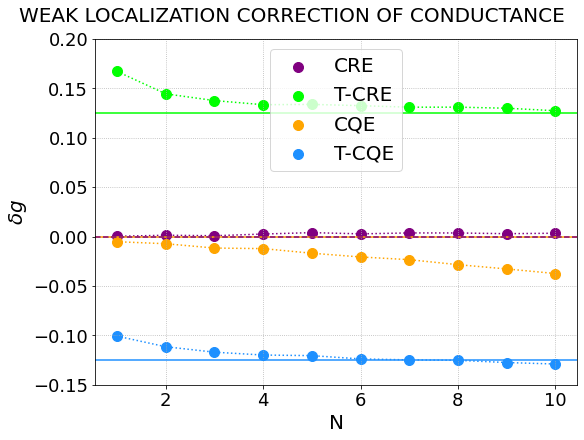

In [34]:
delta_g_D = ((1/1)*(1-2-(-1)))*(1/4)
delta_g_DIII = ((1/2)*(2-2-(-1)))*(1/4)
delta_g_C = ((1/4)*(4-2-(2)))*(1/4)
delta_g_CI = ((1/2)*(2-2-(1)))*(1/4)

fig, axs = plt.subplots(1,1, figsize = (8,6), constrained_layout = True)

fig.suptitle(r'WEAK LOCALIZATION CORRECTION OF CONDUCTANCE', fontsize = 20)

axs.plot([i for i in range(1,11)], (meanG_D - meanG_U), color = 'purple', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], (meanG_DIII - meanG_U), color = 'lime', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], (meanG_C - meanG_U), color = 'orange', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], (meanG_CI - meanG_U), color = 'dodgerblue', linestyle = ':', alpha = 1)

axs.scatter([i for i in range(1,11)], (meanG_D - meanG_U), label = 'CRE', s = 100, color = 'purple', alpha = 1)
axs.scatter([i for i in range(1,11)], (meanG_DIII - meanG_U), label = 'T-CRE' , s = 100, color = 'lime', alpha = 1)
axs.scatter([i for i in range(1,11)], (meanG_C - meanG_U), label = 'CQE', s = 100, color = 'orange', alpha = 1)
axs.scatter([i for i in range(1,11)], (meanG_CI - meanG_U), label = 'T-CQE', s = 100, color = 'dodgerblue', alpha = 1)

axs.set_xlabel('N', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.set_ylabel(r'$\delta g$', fontsize = 20)
axs.grid(linestyle=':')
axs.legend(loc = "best", fontsize = 20)

axs.axhline(y=delta_g_CI, color='dodgerblue', linestyle='-')
axs.axhline(y=delta_g_C, color='orange', linestyle='-')
axs.axhline(y=delta_g_DIII, color='lime', linestyle='-')
axs.axhline(y=delta_g_D, color='purple', linestyle='dashed')

axs.set_ylim([-0.15, 0.2])

print(meanG_C-meanG_U)

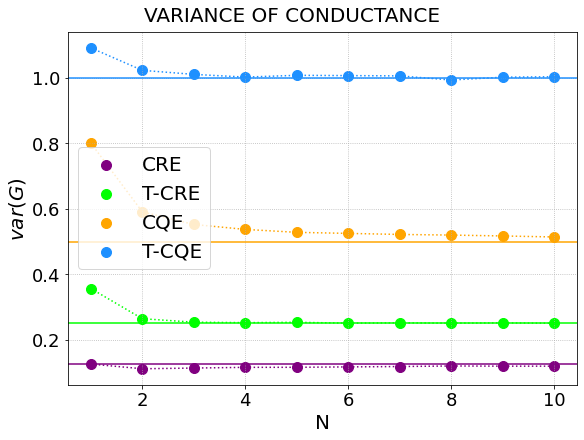

In [35]:
varG_D_aux = np.var(G_D, axis = 0)
varG_DIII_aux = np.var(2*G_DIII, axis = 0)
varG_C_aux = np.var(4*G_C, axis = 0)
varG_CI_aux = np.var(4*G_CI, axis = 0)

fig, axs = plt.subplots(1,1, figsize = (8,6), constrained_layout = True)

fig.suptitle(r'VARIANCE OF CONDUCTANCE', fontsize = 20)

axs.plot([i for i in range(1,11)], varG_D_aux, color = 'purple', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], varG_DIII_aux, color = 'lime', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], varG_C_aux, color = 'orange', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], varG_CI_aux, color = 'dodgerblue', linestyle = ':', alpha = 1)

axs.scatter([i for i in range(1,11)], varG_D_aux, label = 'CRE', s = 100, color = 'purple', alpha = 1)
axs.scatter([i for i in range(1,11)], varG_DIII_aux, label = 'T-CRE' , s = 100, color = 'lime', alpha = 1)
axs.scatter([i for i in range(1,11)], varG_C_aux, label = 'CQE', s = 100, color = 'orange', alpha = 1)
axs.scatter([i for i in range(1,11)], varG_CI_aux, label = 'T-CQE', s = 100, color = 'dodgerblue', alpha = 1)

axs.set_xlabel('N', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.set_ylabel(r'$var(G)$', fontsize = 20)
axs.grid(linestyle=':')
axs.legend(loc = "best", fontsize = 20)

axs.axhline(y=(1/1), color='dodgerblue', linestyle='-')
axs.axhline(y=(1/2), color='orange', linestyle='-')
axs.axhline(y=(1/4), color='lime', linestyle='-')
axs.axhline(y=(1/8), color='purple', linestyle='-')